In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import math

from scipy.stats import friedmanchisquare


pd.set_option('display.max_rows', None, 'display.max_columns', None)

### Integração e Pré-Processamento

In [2]:
# Carrega a base de dados ".csv"
df = pd.read_csv("microdados_eficiencia_academica_2023.csv", sep=';', decimal=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801029 entries, 0 to 801028
Data columns (total 54 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Ano                                   801029 non-null  int64  
 1   Carga Horaria                         801029 non-null  int64  
 2   Carga Horaria Mínima                  801029 non-null  int64  
 3   Categoria da Situação                 801029 non-null  object 
 4   Co Inst                               801029 non-null  int64  
 5   Cod Unidade                           801029 non-null  int64  
 6   Cor / Raça                            801029 non-null  object 
 7   Código da Matricula                   801029 non-null  int64  
 8   Código da Unidade de Ensino - SISTEC  801029 non-null  int64  
 9   Código do Ciclo Matricula             801029 non-null  int64  
 10  Código do Município com DV            801029 non-null  int64  
 11  

In [4]:
data=df.copy()

#Exclusão das colunas referentes a identificação (códigos)
data.drop(columns=['Co Inst','Cod Unidade','Código da Matricula','Código da Unidade de Ensino - SISTEC',
                  'Código do Ciclo Matricula','Código do Município com DV','Número de registros'],
          axis=1, inplace=True)

#Exclusão das colunas redundantes
data.drop(columns=['Situação de Matrícula'],
          axis=1, inplace=True)

#Exclusão de cursos do tipo FIC
data = data[data['Tipo de Curso']!='Qualificação Profissional (FIC)']

#Exclusão das colunas não utilizadas ou com erro
data.drop(columns=['Município','Região','Matrícula Atendida','Ano','Idade','Instituição'],
          axis=1, inplace=True)

#Ajuste do rótulo
data['Categoria da Situação'].replace({'Concluídos':'Concluintes'},inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_41792\2796413045.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Categoria da Situação'].replace({'Concluídos':'Concluintes'},inplace=True)


In [5]:
data.head()

,Carga Horaria,Carga Horaria Mínima,Categoria da Situação,Cor / Raça,Data de Fim Previsto do Ciclo,Data de Inicio do Ciclo,Data de Ocorrencia da Matricula,Eixo Tecnológico,Faixa Etária,Fator Esforço Curso,Fonte de Financiamento,Modalidade de Ensino,Mês De Ocorrência da Situação,Nome de Curso,Renda Familiar,Sexo,Subeixo Tecnológico,Tipo de Curso,Tipo de Oferta,Turno,UF,Unidade de Ensino,Vagas Extraordinárias AC,Vagas Extraordinárias l1,Vagas Extraordinárias l10,Vagas Extraordinárias l13,Vagas Extraordinárias l14,Vagas Extraordinárias l2,Vagas Extraordinárias l5,Vagas Extraordinárias l6,Vagas Extraordinárias l9,Vagas Regulares AC,Vagas Regulares l1,Vagas Regulares l10,Vagas Regulares l13,Vagas Regulares l14,Vagas Regulares l2,Vagas Regulares l5,Vagas Regulares l6,Vagas Regulares l9
0,3610,3000,Em Curso,Parda,28/01/2022,18/09/2017,01/09/2017,Desenvolvimento Educacional e Social,45 a 49 anos,1.500,Sem Programa Associado,Educação Presencial,01/09/2017,Serviço Social,"0,5<RFP<=1",M,Desenvolvimento Social,Bacharelado,Não se aplica,Noturno,CE,Campus Iguatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0,2.0,1.0,2.0,5.0,1.0,5.0,1.0
1,3735,3600,Evadidos,Branca,09/10/2022,09/10/2017,01/10/2017,Controle e Processos Industriais,35 a 39 anos,1.078,Sem Programa Associado,Educação Presencial,01/08/2018,Engenharia Mecânica,"0,5<RFP<=1",F,Mecânica,Bacharelado,Não se aplica,Matutino,MA,Campus São Luís Monte Castelo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,1.0,0.0,4.0,1.0,4.0,0.0
2,3200,2400,Evadidos,Branca,23/08/2022,23/08/2018,01/08/2018,Desenvolvimento Educacional e Social,35 a 39 anos,1.239,Sem Programa Associado,Educação Presencial,01/06/2019,Artes Visuais,Não declarada,F,Desenvolvimento Educacional,Licenciatura,Não se aplica,Matutino,CE,Campus Fortaleza,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0,2.0,1.0,2.0,5.0,1.0,5.0,1.0
3,2440,2400,Em Curso,Parda,22/07/2022,22/07/2019,01/07/2019,Infraestrutura,35 a 39 anos,1.032,Sem Programa Associado,Educação Presencial,01/07/2019,Estradas,"1,5<RFP<=2,5",M,Civil,Tecnologia,Não se aplica,Noturno,CE,Campus Fortaleza,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,2.0,1.0,1.0,4.0,1.0,4.0,1.0
4,3700,3600,Concluintes,Parda,31/12/2022,21/02/2018,01/02/2018,Controle e Processos Industriais,40 a 44 anos,1.078,Sem Programa Associado,Educação Presencial,01/03/2023,Engenharia Mecânica,"RFP>3,5",M,Mecânica,Bacharelado,Não se aplica,Noturno,RS,Campus Sapucaia do Sul,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,5.0,0.0,1.0,0.0,2.0,5.0,2.0,2.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252828 entries, 0 to 801028
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Carga Horaria                    252828 non-null  int64  
 1   Carga Horaria Mínima             252828 non-null  int64  
 2   Categoria da Situação            252828 non-null  object 
 3   Cor / Raça                       252828 non-null  object 
 4   Data de Fim Previsto do Ciclo    252828 non-null  object 
 5   Data de Inicio do Ciclo          252828 non-null  object 
 6   Data de Ocorrencia da Matricula  252828 non-null  object 
 7   Eixo Tecnológico                 252828 non-null  object 
 8   Faixa Etária                     252828 non-null  object 
 9   Fator Esforço Curso              252828 non-null  float64
 10  Fonte de Financiamento           252828 non-null  object 
 11  Modalidade de Ensino             252828 non-null  object 
 12  Mês De 

Contagem de cada classe:
Categoria da Situação
Evadidos       113598
Concluintes     97271
Em Curso        41959
Name: count, dtype: int64

Percentual de cada classe:
Categoria da Situação
Evadidos       44.930941
Concluintes    38.473191
Em Curso       16.595868
Name: proportion, dtype: float64


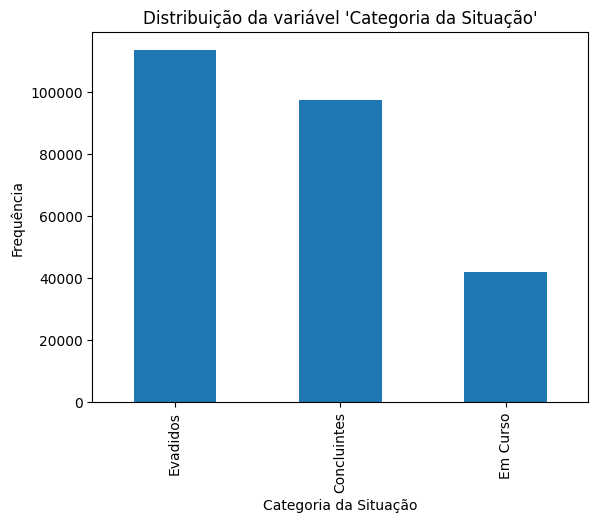

In [7]:
# Verifica a distribuição da variável de previsão 'loan_status'
print("Contagem de cada classe:")
print(data['Categoria da Situação'].value_counts())

print("\nPercentual de cada classe:")
print(data['Categoria da Situação'].value_counts(normalize=True) * 100)

# plot para visualizar a distribuição
data['Categoria da Situação'].value_counts().plot(kind='bar')
plt.title("Distribuição da variável 'Categoria da Situação'")
plt.xlabel("Categoria da Situação")
plt.ylabel("Frequência")
plt.show()

In [8]:
# Verifica a quantidade de dados ausentes em cada coluna
missing_data = data.isnull().sum()
print("Dados ausentes por coluna:")
print(missing_data)

# mostra o percentual de dados ausentes em cada coluna
percent_missing = (data.isnull().sum() / len(data)) * 100
print("\nPercentual de dados ausentes por coluna:")
print(percent_missing)



Dados ausentes por coluna:
Carga Horaria                         0
Carga Horaria Mínima                  0
Categoria da Situação                 0
Cor / Raça                            0
Data de Fim Previsto do Ciclo         0
Data de Inicio do Ciclo               0
Data de Ocorrencia da Matricula       0
Eixo Tecnológico                      0
Faixa Etária                          0
Fator Esforço Curso                   0
Fonte de Financiamento                0
Modalidade de Ensino                  0
Mês De Ocorrência da Situação         0
Nome de Curso                         0
Renda Familiar                        0
Sexo                                  0
Subeixo Tecnológico                4666
Tipo de Curso                         0
Tipo de Oferta                        0
Turno                                 0
UF                                    0
Unidade de Ensino                     0
Vagas Extraordinárias AC           2430
Vagas Extraordinárias l1           2430
Vagas Extraor

In [9]:
data.shape

(252828, 40)

### Manipulação de features

- duracao_curso = Carga Horária / Carga Horária Mínima - relação entre essas duas features demonstra a duração do curso em relação ao mínimo exigido no qual o aluno esta matriculado. Esta nova feature exclui as anteriores (redução de uma feature)

  
- tempo_curso - relaciona o tempo que o aluno esteve matriculado na instituição com o tempo de duração do curso. Esta feature exclui as features ˋData de Fim Previsto do Cicloˋ, ˋData de Inicio do Cicloˋ e ˋMês De Ocorrência da Situaçãoˋ,ˋData de Ocorrencia de Matriculaˋ.

In [10]:
# Identifica as colunas que contêm a palavra "vagas" no título
colunas_vagas = [col for col in df.columns if 'Vagas Regulares' in col]

# Soma os valores dessas colunas para cada linha
data['vagas_regulares'] = df[colunas_vagas].sum(axis=1)

# Duração do Curso
data['duracao_curso'] = data['Carga Horaria']/data['Carga Horaria Mínima']


#Tempo de Curso
## Conversão do tipo de dado
data['Data de Fim Previsto do Ciclo'] = data['Data de Fim Previsto do Ciclo'].astype('datetime64[ns]')
data['Data de Inicio do Ciclo'] = data['Data de Inicio do Ciclo'].astype('datetime64[ns]')
data['Data de Ocorrencia da Matricula'] = data['Data de Ocorrencia da Matricula'].astype('datetime64[ns]')
data['Mês De Ocorrência da Situação'] = data['Mês De Ocorrência da Situação'].astype('datetime64[ns]')



#data['tempo_curso'] = data['Data de Fim Previsto do Ciclo'] - data['Data de Ocorrencia da Matricula'] # Excluida na ultima reunião

#Exclusão das colunas
data.drop(columns=['Vagas Regulares AC','Vagas Regulares l1','Vagas Regulares l10','Vagas Regulares l13',
                   'Vagas Regulares l14','Vagas Regulares l2','Vagas Regulares l5','Vagas Regulares l6','Vagas Regulares l9',
                   'Vagas Extraordinárias AC','Vagas Extraordinárias l1','Vagas Extraordinárias l10','Vagas Extraordinárias l13',
                   'Vagas Extraordinárias l14','Vagas Extraordinárias l2','Vagas Extraordinárias l5','Vagas Extraordinárias l6','Vagas Extraordinárias l9'],
           axis=1, inplace=True)


data.drop(columns=['Carga Horaria','Carga Horaria Mínima','Data de Fim Previsto do Ciclo','Data de Inicio do Ciclo',
                   'Data de Ocorrencia da Matricula','Mês De Ocorrência da Situação'],
          axis=1, inplace=True)



data.head()

,Categoria da Situação,Cor / Raça,Eixo Tecnológico,Faixa Etária,Fator Esforço Curso,Fonte de Financiamento,Modalidade de Ensino,Nome de Curso,Renda Familiar,Sexo,Subeixo Tecnológico,Tipo de Curso,Tipo de Oferta,Turno,UF,Unidade de Ensino,vagas_regulares,duracao_curso
0,Em Curso,Parda,Desenvolvimento Educacional e Social,45 a 49 anos,1.500,Sem Programa Associado,Educação Presencial,Serviço Social,"0,5<RFP<=1",M,Desenvolvimento Social,Bacharelado,Não se aplica,Noturno,CE,Campus Iguatu,35.0,1.203333
1,Evadidos,Branca,Controle e Processos Industriais,35 a 39 anos,1.078,Sem Programa Associado,Educação Presencial,Engenharia Mecânica,"0,5<RFP<=1",F,Mecânica,Bacharelado,Não se aplica,Matutino,MA,Campus São Luís Monte Castelo,20.0,1.037500
2,Evadidos,Branca,Desenvolvimento Educacional e Social,35 a 39 anos,1.239,Sem Programa Associado,Educação Presencial,Artes Visuais,Não declarada,F,Desenvolvimento Educacional,Licenciatura,Não se aplica,Matutino,CE,Campus Fortaleza,35.0,1.333333
3,Em Curso,Parda,Infraestrutura,35 a 39 anos,1.032,Sem Programa Associado,Educação Presencial,Estradas,"1,5<RFP<=2,5",M,Civil,Tecnologia,Não se aplica,Noturno,CE,Campus Fortaleza,30.0,1.016667
4,Concluintes,Parda,Controle e Processos Industriais,40 a 44 anos,1.078,Sem Programa Associado,Educação Presencial,Engenharia Mecânica,"RFP>3,5",M,Mecânica,Bacharelado,Não se aplica,Noturno,RS,Campus Sapucaia do Sul,34.0,1.027778


In [11]:
data.rename(columns={'Categoria da Situação':'situacao', 'Eixo Tecnológico':'eixo_tec', 'Faixa Etária':'faixa_etaria',
       'Fator Esforço Curso':'esforco', 'Fonte de Financiamento':'financiamento', 'Instituição':'instituicao',
       'Modalidade de Ensino':'modalidade', 'Nome de Curso':'curso', 'Renda Familiar':'renda_familiar',
       'Subeixo Tecnológico':'subeixo_tec', 'Tipo de Curso':'tipo_curso', 'Tipo de Oferta':'tipo_oferta', 'Turno':'turno', 'UF':'uf',
       'Unidade de Ensino':'unidade'},inplace=True)

data.columns

Index(['situacao', 'Cor / Raça', 'eixo_tec', 'faixa_etaria', 'esforco',
       'financiamento', 'modalidade', 'curso', 'renda_familiar', 'Sexo',
       'subeixo_tec', 'tipo_curso', 'tipo_oferta', 'turno', 'uf', 'unidade',
       'vagas_regulares', 'duracao_curso'],
      dtype='object')

### Adicionando informações sobre a unidade de ensino

- RAP - relação entre o número de alunos e  número de professores
- Número de servidores
- Taxa de Ocupação - percentual de ocupação das vagas ofertadas pela unidade
- ITCD - índice de titulação dos docentes. Sendo 5 a unidade que tem 100% dos docentes com título de doutor.
- PIB per Capita
- Hierarquia urbana


In [12]:
# Carregando arquivo com informação das unidades de ensino
df_unidades = pd.read_excel("Indicadores das Unidades.xlsx",decimal=',')

#Junção dos arquivos
data_1 = pd.merge(data, df_unidades, on='unidade', how='left')

#Exclusão e renomeação de colunas
data_1.drop(columns=['instituicao'],
          axis=1, inplace=True)
data_1.rename(columns={'Município_y':'Município','Instituição_x':'Instituição'},inplace=True)

In [13]:
data_1.to_csv("microdados_2023_tratado.csv", sep=';', decimal=',', index=False)